In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

### Read the Data

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


### Understand the Distribution
To understand distributions of variables as they relate to diseases, let's try splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [4]:
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): [np.str_('Atelectasis'), np.str_('Cardiomegaly'), np.str_('Consolidation'), np.str_('Edema'), np.str_('Effusion'), np.str_('Emphysema'), np.str_('Fibrosis'), np.str_('Infiltration'), np.str_('Mass'), np.str_('No Finding'), np.str_('Nodule'), np.str_('Pleural_Thickening'), np.str_('Pneumonia'), np.str_('Pneumothorax')]


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
410,411,411,No Finding,40,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
771,772,772,Effusion,31,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,890,890,No Finding,43,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### TODO - 1
Now write your code here to visualize some of the distributions specified in the instructions

[Text(0, 0.5, 'Number of Images with Label')]

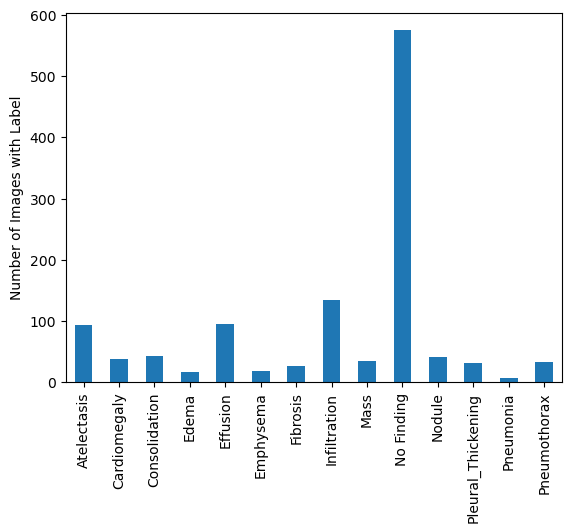

In [5]:
ax = data[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

<Axes: xlabel='Finding Labels'>

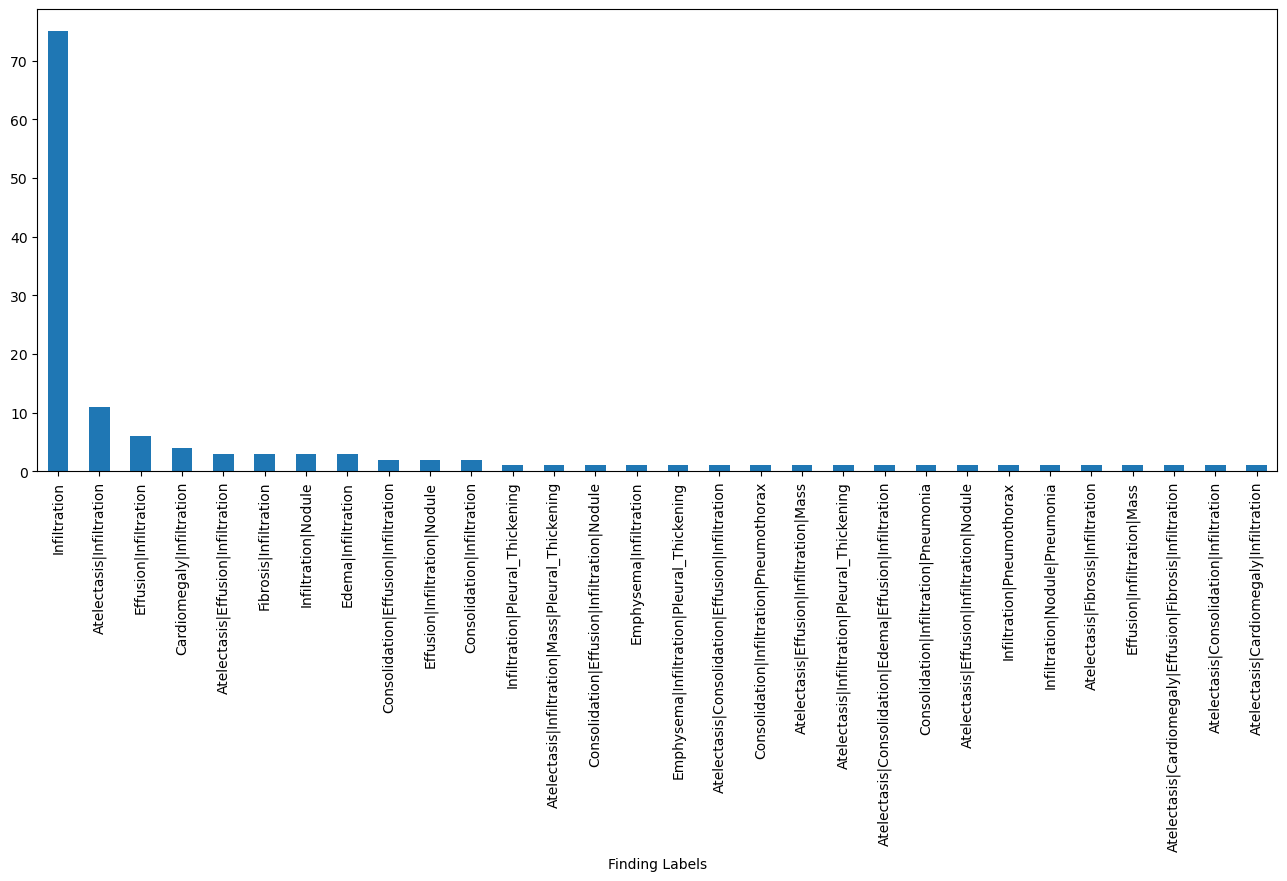

In [6]:
plt.figure(figsize=(16,6))
data[data['Infiltration']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

<Axes: xlabel='Finding Labels'>

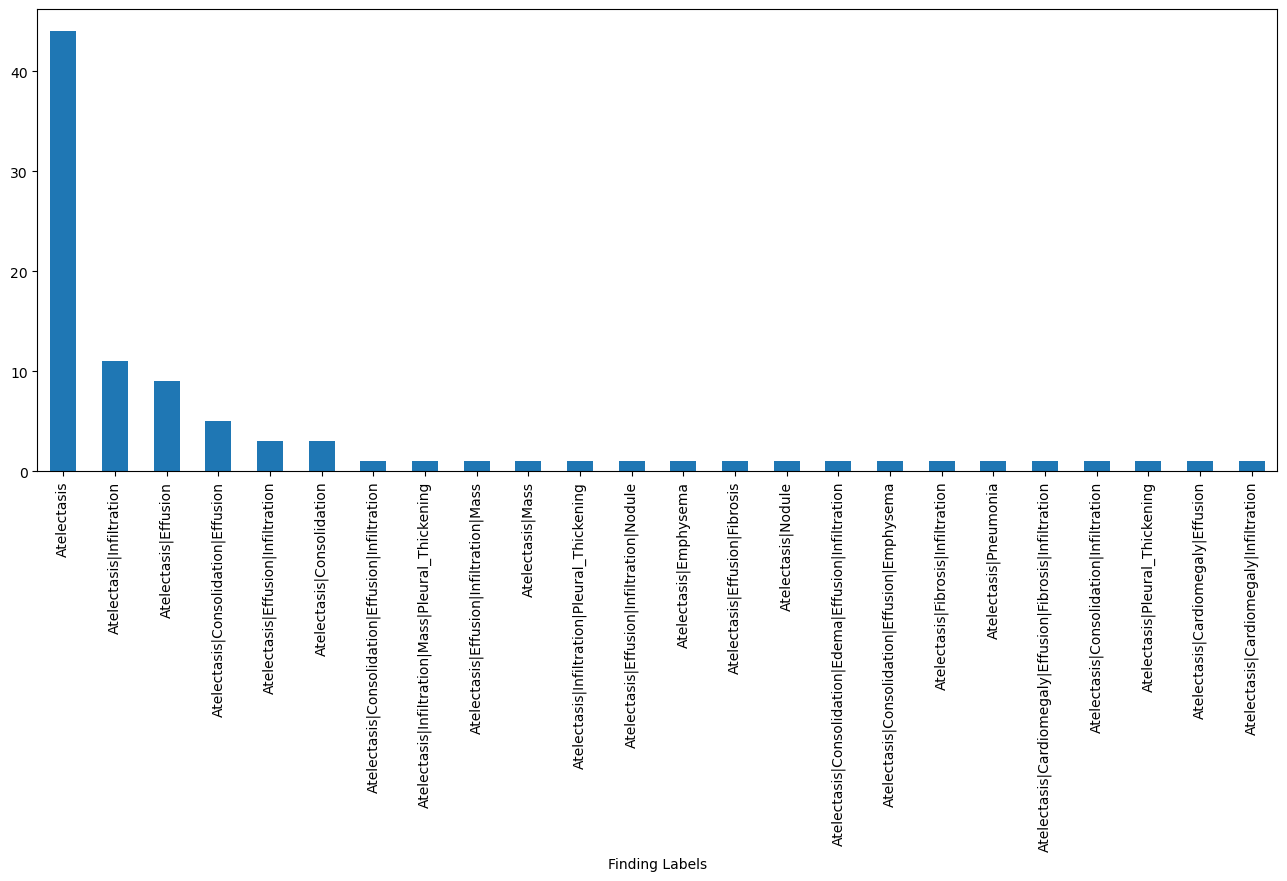

In [7]:
plt.figure(figsize=(16,6))
data[data['Atelectasis']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

(array([ 29.,  51.,  60.,  96., 154., 194., 229., 109.,  58.,  19.]),
 array([ 6. , 14.1, 22.2, 30.3, 38.4, 46.5, 54.6, 62.7, 70.8, 78.9, 87. ]),
 <BarContainer object of 10 artists>)

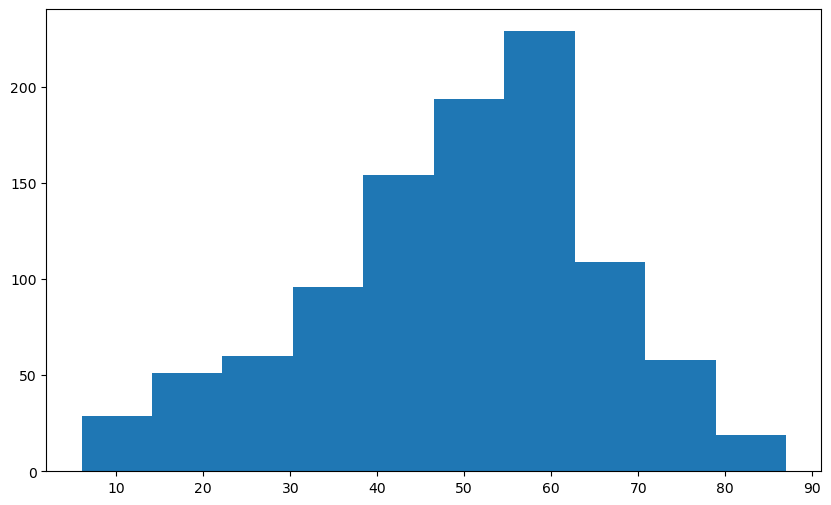

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['Patient Age'])

(array([ 8., 11., 14., 15., 18., 27., 30.,  4.,  4.,  3.]),
 array([11. , 18.6, 26.2, 33.8, 41.4, 49. , 56.6, 64.2, 71.8, 79.4, 87. ]),
 <BarContainer object of 10 artists>)

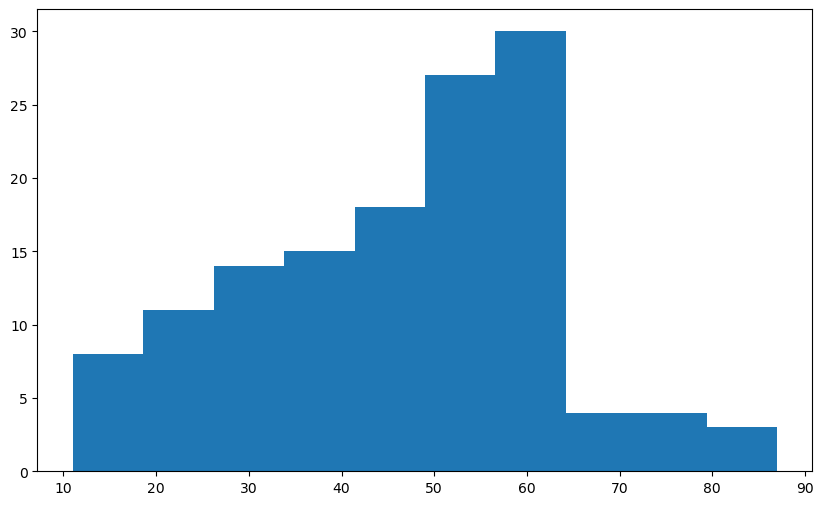

In [9]:
plt.figure(figsize=(10,6))
plt.hist(data[data['Infiltration']==1.0]['Patient Age'])

(array([ 3.,  1., 10.,  9., 12., 27., 19.,  8.,  3.,  1.]),
 array([13. , 20.4, 27.8, 35.2, 42.6, 50. , 57.4, 64.8, 72.2, 79.6, 87. ]),
 <BarContainer object of 10 artists>)

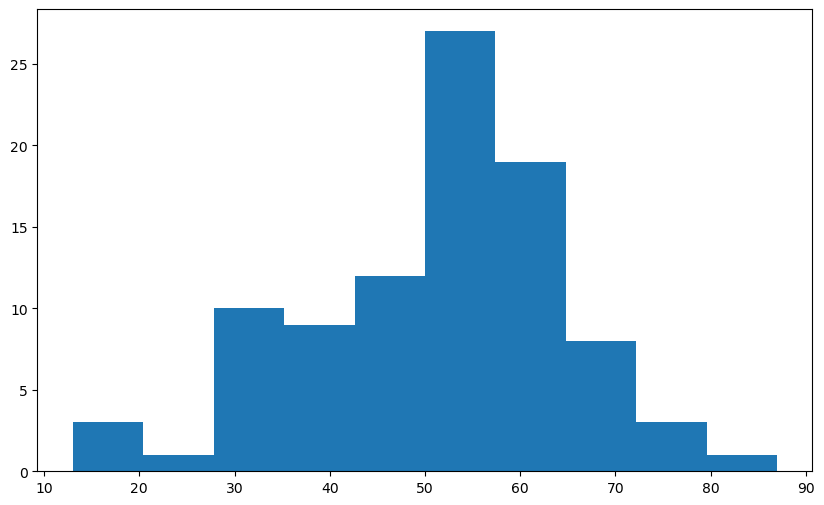

In [10]:
plt.figure(figsize=(10,6))
plt.hist(data[data['Atelectasis']==1]['Patient Age'])

<Axes: xlabel='Patient Gender'>

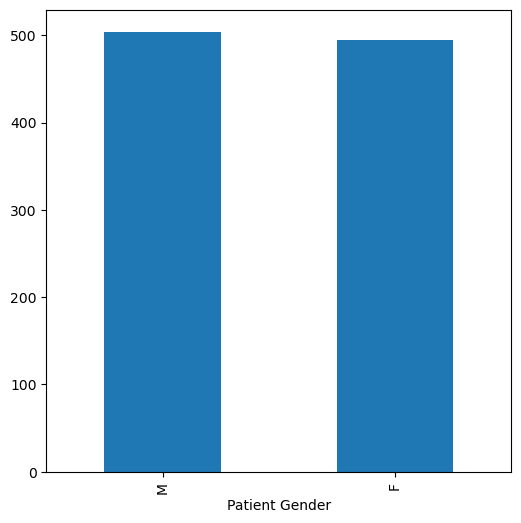

In [11]:
plt.figure(figsize=(6,6))
data['Patient Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Patient Gender'>

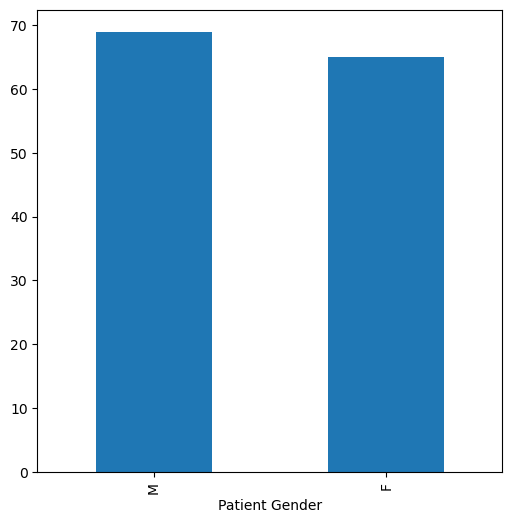

In [12]:
plt.figure(figsize=(6,6))
data[data['Infiltration'] ==1]['Patient Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Patient Gender'>

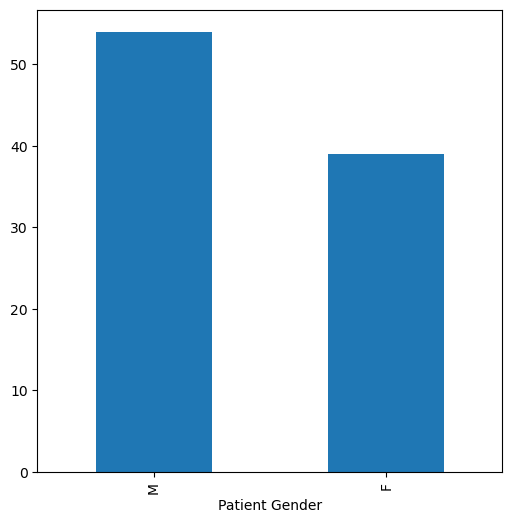

In [13]:
plt.figure(figsize=(6,6))
data[data['Atelectasis'] ==1]['Patient Gender'].value_counts().plot(kind='bar')

### How age & gender relate to the mass size?
Finally, look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

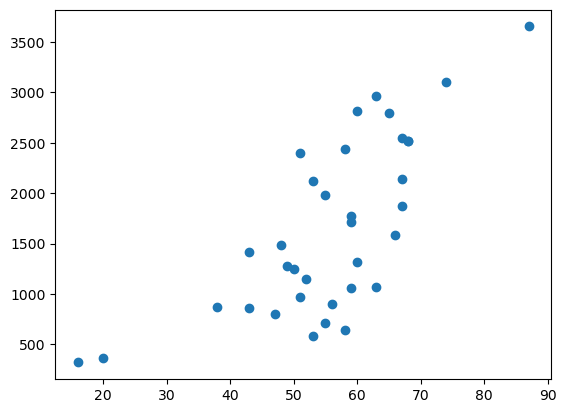

In [14]:
plt.scatter(data['Patient Age'],data['Mass_Size'])

In [15]:
mass_sizes = data[data['Mass_Size']>0]['Mass_Size'].values
ages = data[data['Mass_Size']>0]['Patient Age'].values

### TODO - 2
Use the following to see if there are significant correlations between the two:

`scipy.stats.pearsonr(mass_sizes,ages)`<br>
`scipy.stats.ttest_ind(mass_sizes_male, mass_sizes_female)`

In [16]:
scipy.stats.pearsonr(mass_sizes,ages)

PearsonRResult(statistic=np.float64(0.7275663300043572), pvalue=np.float64(7.354553889322014e-07))

In [17]:
mass_sizes_male = data[data['Patient Gender']=='M']['Mass_Size'].values
mass_sizes_female = data[data['Patient Gender']=='F']['Mass_Size'].values

In [18]:
scipy.stats.ttest_ind(mass_sizes_male, mass_sizes_female, nan_policy='omit')

TtestResult(statistic=np.float64(0.6188395721019645), pvalue=np.float64(0.5402707532656863), df=np.float64(33.0))